In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

path_to_train = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
path_to_id = '/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'
path_to_validat = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"

In [2]:
df = pd.read_csv(path_to_train)
valid_df = pd.read_csv(path_to_validat)
ids = pd.read_csv(path_to_id)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Prepare

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
categ_feach=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour',
            'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
            'HouseStyle', 'OverallQual', 'OverallCond',
            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'Heating',
            'HeatingQC',  'Electrical',  'KitchenQual',
            'Functional', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual',
            'GarageCond', 'PavedDrive', 'PoolQC',
            'Fence', 'MiscFeature', 'MiscVal', 'SaleType',
            'SaleCondition','CentralAir','Garage_Old']
float_feach=['LotFrontage','LotArea', 'MasVnrArea',
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
             'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
             'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
             'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'TotalSF']
date_type_feach=['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd','GarageYrBlt']

## Fill NAN`s

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
ntrain = df.shape[0]
ntest = valid_df.shape[0]
y=df['SalePrice']
all_data = pd.concat((df, valid_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [9]:
def nan_counter():
  nan_counts = all_data.isna().sum()
  nan_counts = nan_counts[nan_counts > 0]
  print(nan_counts)
  return(nan_counts)

In [10]:
nan_counts=nan_counter()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [11]:
all_data.loc[all_data['PoolArea'] == 0, 'PoolQC'] = 'NA'

In [12]:
all_data.loc[all_data['GarageArea'].isna(), 'GarageType'] = 'NA'

Some mode and median transform

In [13]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [14]:
columns_mode = ['MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd']
for col_mod in columns_mode:
  all_data[col_mod] = all_data[col_mod].fillna(all_data[col_mod].mode()[0])

### Some NaN fill with typical data for NaN.

In [15]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea','GarageArea','GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [16]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            "Alley","FireplaceQu",'Fence','MiscFeature','MasVnrType','GarageType',
            'GarageFinish','GarageQual','GarageCond',"PoolQC"):
    all_data[col] = all_data[col].fillna('NA')

In [17]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [18]:
all_data["SaleType"] = all_data["SaleType"].fillna("Oth")

### New feachure

In [19]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [20]:
label = LabelEncoder()
all_data['Garage_Old']=pd.qcut(all_data['GarageYrBlt'],3)

all_data['Garage_Old']=label.fit_transform(all_data['Garage_Old'])
all_data['Garage_Old']=all_data['Garage_Old'].map({0:1, 1:2, 2:3})
all_data['Garage_Old'].fillna(0, inplace = True)

### After extracting data from this columns droped them.

In [21]:
all_data = all_data.drop(['Id','Utilities'],  axis=1)
all_data = all_data.drop(columns=date_type_feach)

### Let's search our DataFrames if any NaN left.

In [22]:
nan_counts=nan_counter()

Series([], dtype: int64)


Its no NaN left.

## Encoding

In [23]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF,Garage_Old
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,WD,Normal,2566.0,3.0
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,WD,Normal,2524.0,2.0
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,WD,Normal,2706.0,3.0
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,Corner,Gtl,...,0,0,NA,NA,NA,0,WD,Abnorml,2473.0,3.0
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,FR2,Gtl,...,0,0,NA,NA,NA,0,WD,Normal,3343.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,WD,Normal,1638.0,0.0
2915,160,RM,21.0,1894,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,WD,Abnorml,1638.0,2.0
2916,20,RL,160.0,20000,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,NA,NA,0,WD,Abnorml,2448.0,1.0
2917,85,RL,62.0,10441,Pave,NA,Reg,Lvl,Inside,Gtl,...,0,0,NA,MnPrv,Shed,700,WD,Normal,1882.0,0.0


In [24]:
ord= OrdinalEncoder()
all_data[categ_feach] = ord.fit_transform(all_data[categ_feach])

scal=StandardScaler()
all_data[float_feach] = scal.fit_transform(all_data[float_feach])

In [25]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,TotalSF,Garage_Old
0,5.0,3.0,-0.209359,-0.217879,1.0,1.0,3.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,4.0,0.023003,3.0
1,0.0,3.0,0.481900,-0.072044,1.0,1.0,3.0,3.0,2.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,4.0,-0.029172,2.0
2,5.0,3.0,-0.071107,0.137197,1.0,1.0,0.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,4.0,0.196920,3.0
3,6.0,3.0,-0.439779,-0.078385,1.0,1.0,0.0,3.0,0.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,0.0,-0.092527,3.0
4,5.0,3.0,0.666236,0.518903,1.0,1.0,0.0,3.0,2.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,4.0,0.988241,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,13.0,4.0,-2.237052,-1.043937,1.0,1.0,3.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,4.0,-1.129816,0.0
2915,13.0,4.0,-2.237052,-1.049263,1.0,1.0,3.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,0.0,-1.129816,2.0
2916,0.0,3.0,4.168614,1.246808,1.0,1.0,3.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,4.0,1.0,0.0,8.0,0.0,-0.123584,1.0
2917,9.0,3.0,-0.347611,0.034605,1.0,1.0,3.0,3.0,4.0,0.0,...,-0.285935,-0.06315,3.0,2.0,3.0,17.0,8.0,4.0,-0.826704,0.0


## Splitting data back

In [26]:
df = all_data[:ntrain]
valid_df = all_data[ntrain:]

# Outliers

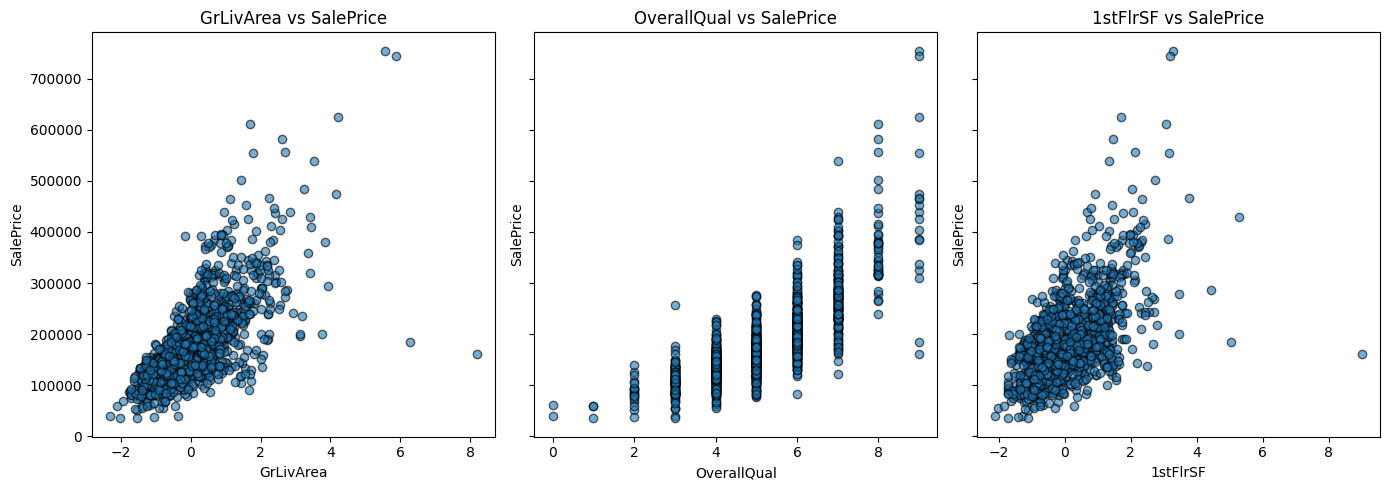

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)


columns = ['GrLivArea', 'OverallQual', '1stFlrSF']


for ax, col in zip(axes, columns):
    ax.scatter(df[col], y, alpha=0.6, edgecolors='k')
    ax.set_title(f'{col} vs SalePrice')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

As we can see, there are many outliers. So, we need to apply some data transformation.

In [28]:
def y_scaler(Y):
  y_scaled = np.log1p(y)
  return y_scaled

def y_descaler(y_scaled):
  Y=np.expm1(y_scaled)
  return Y

In [29]:
y_sc=y_scaler(y)

Getting rid of outliers of SalePrice

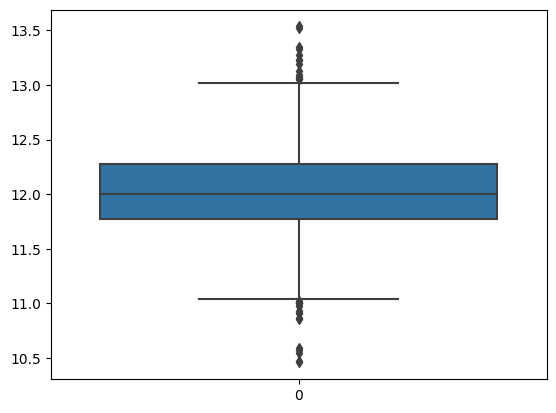

In [30]:
sns.boxplot(y_sc)
plt.show()

In [31]:
Q1 = y_sc.quantile(0.25)
Q3 = y_sc.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

y_cleaned = np.clip(y_sc, lower_bound, upper_bound)

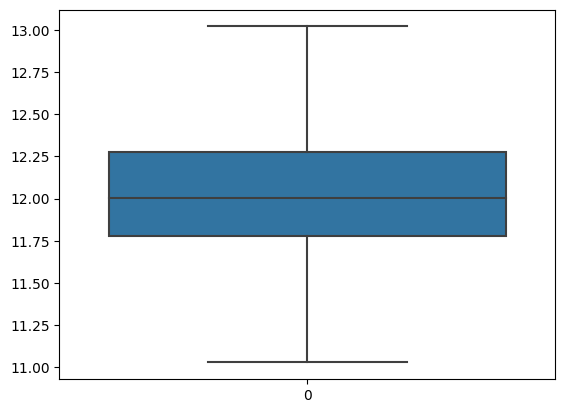

In [32]:
sns.boxplot(y_cleaned)
plt.show()

In [33]:
def clean_and_transform(df):
    df_cleaned = df.copy()
    log_transformed_cols = []

    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        # IQR
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)

        # if skewness > 0.75 log
        skewness = df_cleaned[col].skew()
        if skewness > 0.75 and df_cleaned[col].min() > 0:
            df_cleaned[col] = np.log1p(df_cleaned[col])
            log_transformed_cols.append(col)

    # StandardScaler
    scaler = StandardScaler()
    df_cleaned[df_cleaned.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df_cleaned.select_dtypes(include=[np.number]))

    return df_cleaned

In [34]:
df_cleaned = clean_and_transform(df)
valid_df_cleaned = clean_and_transform(valid_df)

Data before transform (circles are outliers)

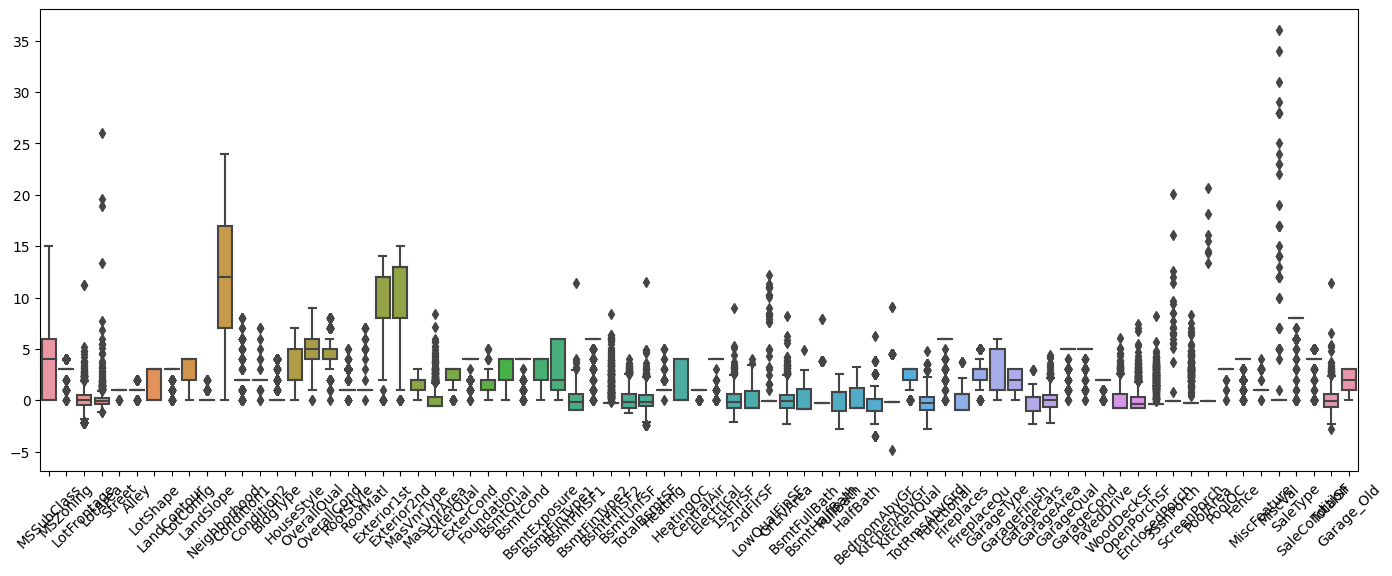

In [35]:
plt.figure(figsize=(17, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

And after transform

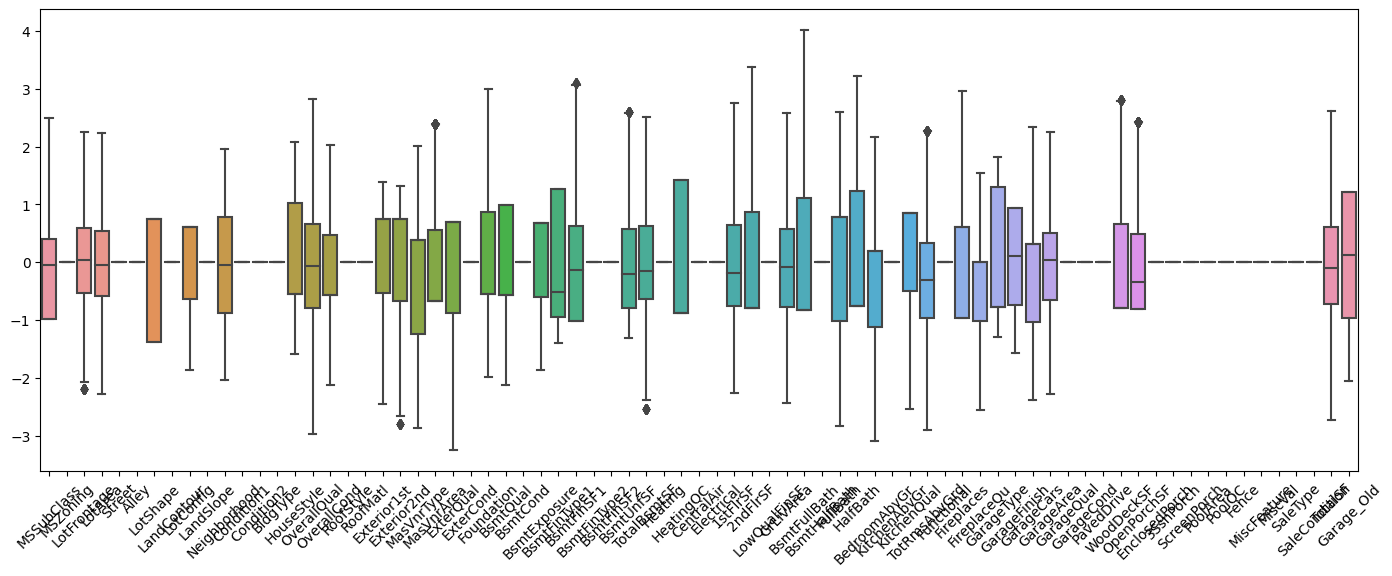

In [36]:
plt.figure(figsize=(17, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

# Models

In [37]:
def rmsle(y, y_pred):
  rmsle_score = np.sqrt(mean_squared_error(np.log1p(y), np.log1p(y_pred)))
  return(rmsle_score)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y_cleaned, test_size=0.2, random_state=42)

## RF

In [39]:
RFmodel = make_pipeline(RobustScaler(),RandomForestRegressor(n_estimators=300,  random_state=42))

In [40]:
RFmodel.fit(X_train, y_train)
RFmodel_pred_sc = RFmodel.predict(X_test)

rmsle_res_rf = rmsle(y_descaler(RFmodel_pred_sc), y_descaler(y_test))

test_score = RFmodel.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_rf)

R^2: 0.8921338255666922
rmsle: 0.13493944937604416


In [41]:
rf_valid = RFmodel.predict(valid_df_cleaned)
RFmodel_val_pred = y_descaler(rf_valid)

## Lasso

In [42]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [43]:
lasso.fit(X_train, y_train)
lasso_pred_sc = lasso.predict(X_test)
rmsle_res_lasso = rmsle(y_descaler(lasso_pred_sc),y_descaler(y_test))

test_score = lasso.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_lasso)

R^2: 0.8966327381239421
rmsle: 0.13209543264257192


In [44]:
lasso_valid = lasso.predict(valid_df_cleaned)
lasso_val_pred = y_descaler(lasso_valid)

## KRR

In [45]:
param_grid = {
    "alpha": [0.1, 0.5, 0.6, 1, 5, 10],
    "kernel": ["polynomial", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "coef0": [0, 1, 2.5, 5]
}

kr_model = KernelRidge()
grid_search = GridSearchCV(kr_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

KRR = grid_search.best_estimator_

In [46]:
KRR_pred_sc = KRR.predict(X_test)
rmsle_res_KRR = rmsle(y_descaler(KRR_pred_sc),y_descaler(y_test))

test_score = KRR.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_KRR)

R^2: 0.9007810148189795
rmsle: 0.12941770254370732


In [47]:
KRR_train = KRR.predict(X_train)
KRR_valid = KRR.predict(valid_df_cleaned)
KRR_val_pred = y_descaler(KRR_valid)

## ElasticNet

In [48]:
EN_model = make_pipeline(RobustScaler(), ElasticNet(random_state=3))

param_grid = {
    "elasticnet__alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01],
    "elasticnet__l1_ratio": [0.5, 0.7, 0.85, 0.9, 0.95, 1]
}

grid_search = GridSearchCV(EN_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

EN = grid_search.best_estimator_

In [49]:
EN_pred_sc = EN.predict(X_test)
rmsle_res_EN = rmsle(y_descaler(EN_pred_sc),y_descaler(y_test))

test_score = EN.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_EN)

R^2: 0.8973858189619935
rmsle: 0.1316133632341915


In [50]:
EN_model_valid = EN.predict(valid_df_cleaned)
EN_model_val_pred = y_descaler(EN_model_valid)

In [51]:
stacking = StackingRegressor(
    estimators=[("KRR", KRR), ("Lasso", lasso), ("RandomForest", RFmodel)],
    final_estimator=EN)

voting = VotingRegressor([("KRR", KRR), ("Lasso", lasso), ("RandomForest", RFmodel),('ElasticNet',EN_model)])

stacking.fit(X_train, y_train)
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('KRR',
                             KernelRidge(alpha=10, coef0=2.5,
                                         kernel='polynomial')),
                            ('Lasso',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('lasso',
                                              Lasso(alpha=0.0005,
                                                    random_state=1))])),
                            ('RandomForest',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_estimators=300,
                                                                    random_state=42))])),
                            ('ElasticNet',
                             Pipeline(steps=[('robustscaler', RobustScaler()),
                                             ('elasticnet',
                                              ElasticNet(random_state=3))]))])

In [52]:
voting_test = voting.predict(X_test)
voting_valid = voting.predict(valid_df_cleaned)
voting_val_pred = y_descaler(voting_valid)

In [53]:
rmsle_res_voting = rmsle(y_descaler(voting_test),y_descaler(y_test))

test_score = voting.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_voting)

R^2: 0.8398309312845782
rmsle: 0.16443172796837108


In [54]:
staking_test = stacking.predict(X_test)
stacking_valid = stacking.predict(valid_df_cleaned)
stacking_val_pred = y_descaler(stacking_valid)

In [55]:
rmsle_res_stacking = rmsle(y_descaler(staking_test),y_descaler(y_test))

test_score = stacking.score(X_test, y_test)
print("R^2:", test_score)
print("rmsle:", rmsle_res_stacking)

R^2: 0.9077882945642246
rmsle: 0.12476400936651298


# Visualization

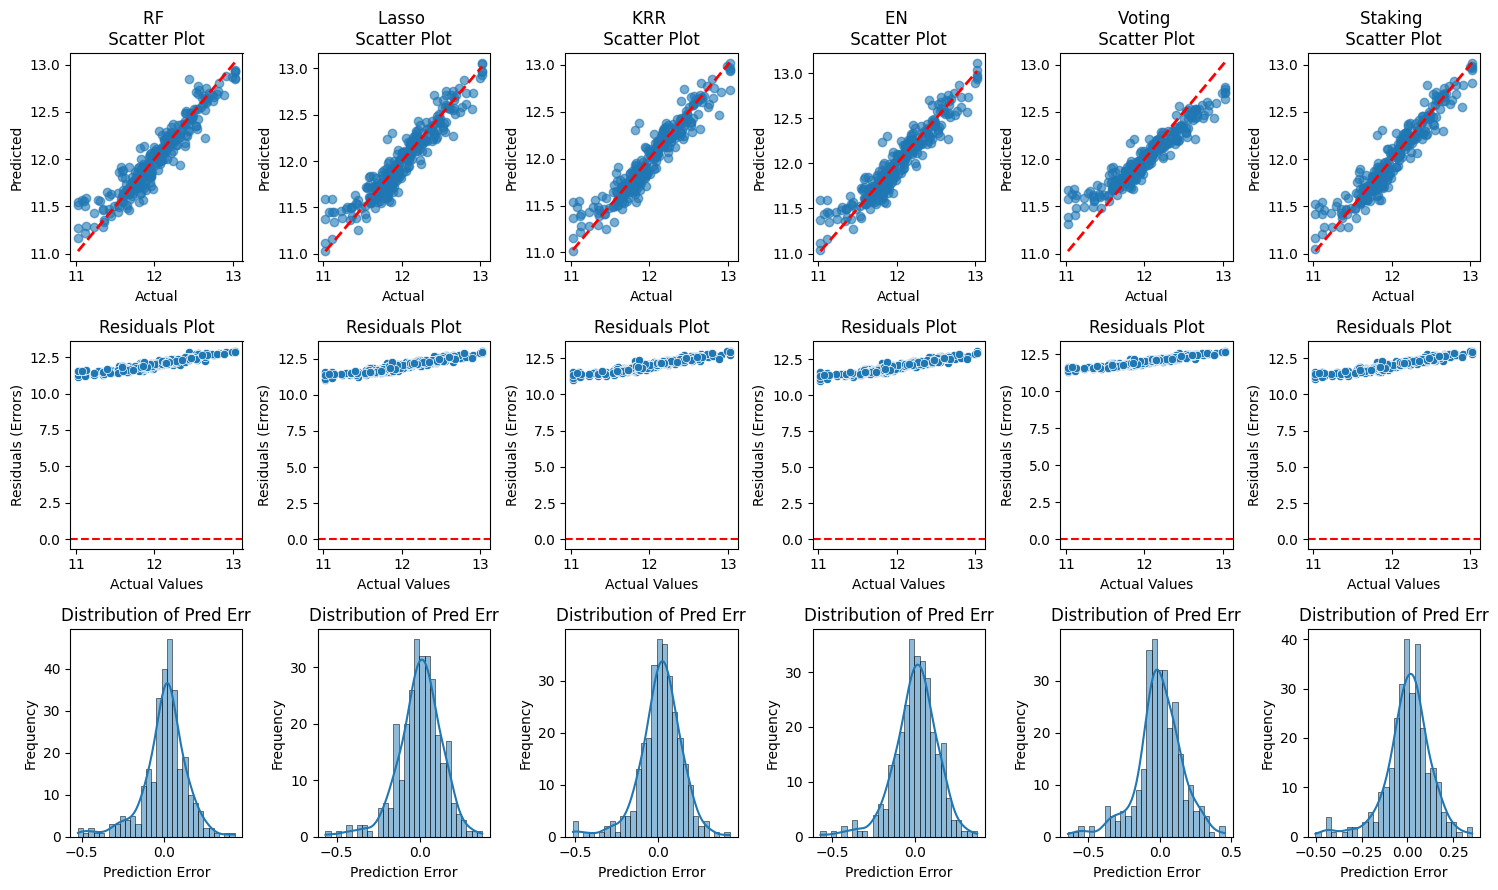

In [56]:
models_test = [RFmodel_pred_sc, lasso_pred_sc, KRR_pred_sc, EN_pred_sc, voting_test, staking_test]
models_name = ['RF', 'Lasso', 'KRR', 'EN', 'Voting', 'Staking']
fig, ax = plt.subplots(3, len(models_test), figsize=(15, 9))

for i, model_test in enumerate(models_test):
    ax[0,i].scatter(y_test, model_test, alpha=0.6)
    ax[0,i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', lw=2)
    ax[0,i].set_title(f"{models_name[i]} \n Scatter Plot ")
    ax[0,i].set_xlabel("Actual")
    ax[0,i].set_ylabel("Predicted")

    residuals = y_test - model_test
    sns.scatterplot(x=y_test, y=model_test, ax=ax[1,i])
    ax[1,i].axhline(y=0, color='r', linestyle='--')
    ax[1,i].set_xlabel("Actual Values")
    ax[1,i].set_ylabel("Residuals (Errors)")
    ax[1,i].set_title("Residuals Plot")
    ax[1,i]

    sns.histplot(residuals, bins=30, kde=True, ax=ax[2,i])
    ax[2,i].set_xlabel("Prediction Error")
    ax[2,i].set_ylabel("Frequency")
    ax[2,i].set_title("Distribution of Pred Err")

plt.tight_layout()
plt.show()

# Output

Using an empirical approach, it was found that stacking performs best with a result of 0.139, followed by voting with 0.1414. Next is KRR - 0.1418, Lasso - 0.1453, ElasticNet - 0.1456, RandomForest - 0.1562.

In [57]:
results = pd.DataFrame({
    'Id': ids['Id'],
    'SalePrice': stacking_val_pred
}).reset_index(drop=True)

In [58]:
results.to_csv('Stacking_final.csv', index=False)